In [4]:
import tensorflow as tf
from keras.datasets import cifar100
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2 
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

Import data and labels 

In [6]:
(training_images, training_labels), (testing_images, testing_labels) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [8]:
labels = pd.read_csv(r"/content/cifar100_labels.csv", header=None, index_col=0)

In [9]:
labels.head()

,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


In [10]:
print("Shape of training images:", training_images.shape)
print("Shape of testing images:", testing_images.shape)
print("Shape of training labels:", training_labels.shape)

Shape of training images: (50000, 32, 32, 3)
Shape of testing images: (10000, 32, 32, 3)
Shape of training labels: (50000, 1)


In [11]:
print(np.unique(training_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [12]:
training_images.shape

(50000, 32, 32, 3)

Visualization of Image

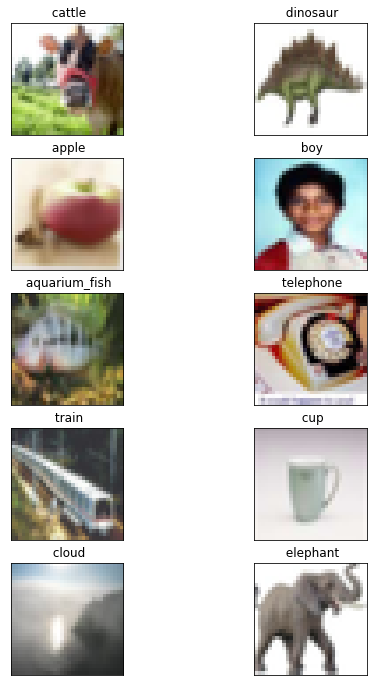

In [13]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[1][training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
#  print(training_labels[i])
plt.show()


Normalizing Image

In [14]:
training_images = training_images/255.
testing_images = testing_images/255

CNN Model

In [15]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(training_labels)), activation = 'softmax')
                             
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [18]:
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience=3)


In [21]:
history = model.fit(training_images, training_labels, epochs=50, callbacks=[early_stop],
                    validation_data=(testing_images, testing_labels))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9609 - accuracy: 0.7100 - val_loss: 3.2548 - val_accuracy: 0.3744
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8799 - accuracy: 0.7321 - val_loss: 3.4059 - val_accuracy: 0.3766
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8034 - accuracy: 0.7545 - val_loss: 3.6288 - val_accuracy: 0.3657
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7409 - accuracy: 0.7714 - val_loss: 3.8849 - val_accuracy: 0.3596
Epoch 4: early stopping


Model Performance 

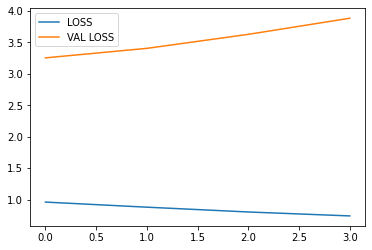

In [22]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['val_loss'], label="VAL LOSS")
plt.legend(loc='best')
plt.show()

In [23]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

In [24]:
print(accuracy_score(testing_labels, pred))

0.3596


In [25]:
testing_labels=testing_labels.astype('float')
print(log_loss(testing_labels, prob))

3.8842226364076637


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testing_labels, pred)

array([[73,  2,  2, ...,  0,  0,  0],
       [ 1, 41,  1, ...,  0,  0,  0],
       [ 0,  2, 17, ...,  2,  4,  1],
       ...,
       [ 0,  0,  0, ..., 35,  1,  0],
       [ 1,  1,  2, ...,  0, 11,  2],
       [ 1,  0,  0, ...,  0,  1, 29]])

In [27]:
testing_labels = testing_labels.astype('int')

Visualization

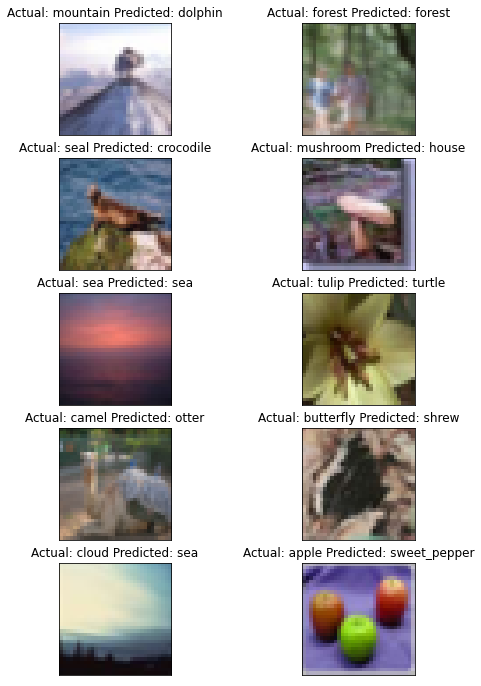

In [28]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "Actual:"+ labels[1][testing_labels[i][0]] + " Predicted:" + labels[1][pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()